# An analysis of Road Home grant funding in New Orleans

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('style/advocate.mplstyle')
%matplotlib inline
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
rh_blocks_nola = gpd.read_file('processed data/rh_blocks_nola_flood_GT3.geojson')
rh_neighborhoods = gpd.read_file('processed data/rh_neighborhoods_flood_GT3.geojson')
rh_neighborhoods = rh_neighborhoods.rename(columns = {'index' : 'neighborhood'})
rh_neighborhoods = rh_neighborhoods.set_index('neighborhood')

Terminology:
- Blocks: Census Blocks based on boundaries and demographics based on 2000 Tiger/Line. Only blocks that received more than 3 feet of flooding are considered in this analysis.
- Neighborhoods: Neighborhood Statistical Areas defined by The Data Center based on 2000 boundaries
- Damage: Damage as assessed by the Road Home program
- Uncovered damage: The amount by which the damage exceeded the amount of Road Home grants (CG and ACG) plus the amount of insurance

## Maps

Visual representation of the percentage of damage not covered by insurance or Road Home grants by Census block in New Orleans.

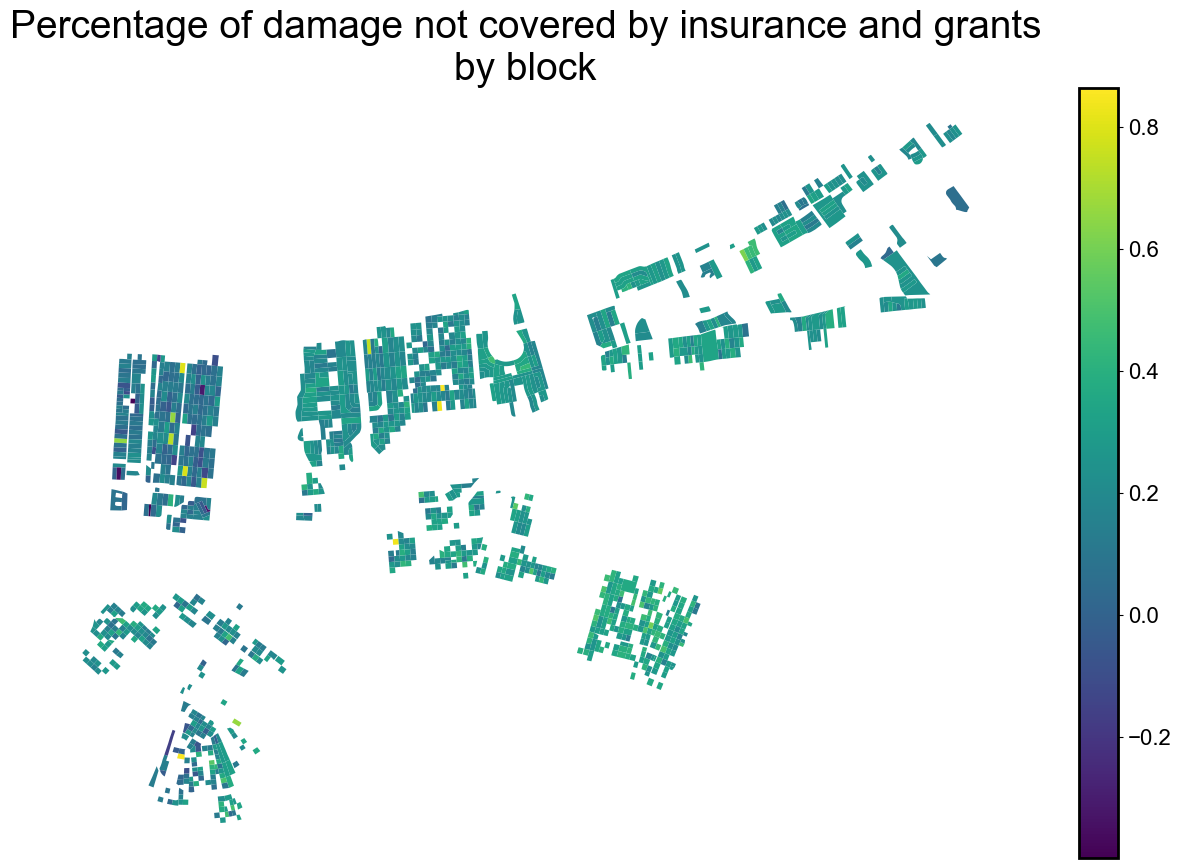

In [5]:
fig, ax = plt.subplots(figsize=(17,10))
rh_blocks_nola.plot(column='uncovered_percent', ax=ax, legend=True)
plt.title('Percentage of damage not covered by insurance and grants\nby block')
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

Visual representation of the percentage of damage not covered by insurance or Road Home grants by Neighborhood Statistical Area in New Orleans.

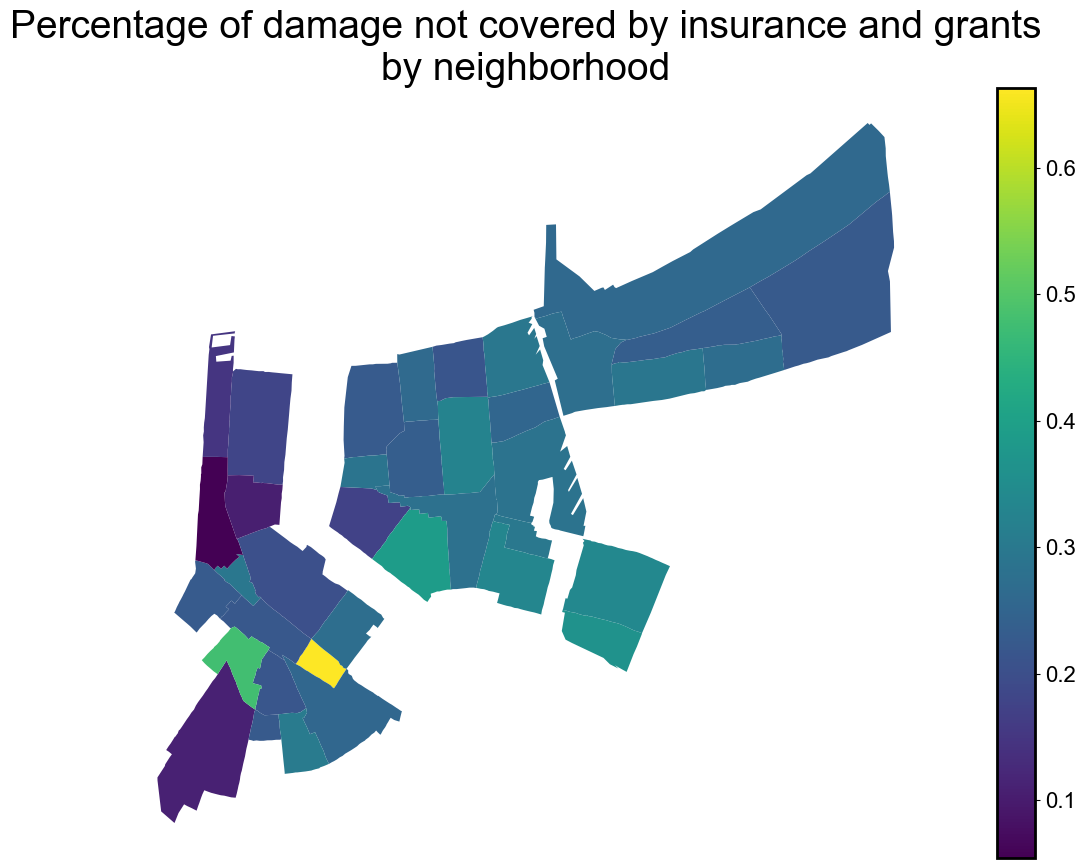

In [6]:
fig, ax = plt.subplots(figsize=(17,10))
rh_neighborhoods.plot(column='uncovered_percent', ax=ax, legend=True)
plt.title('Percentage of damage not covered by insurance and grants\nby neighborhood')
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

### Percent of uncovered damage by blocks and neighborhoods

There is a negative correlation between the percentage of a block's populaton that is non-Hispanic White and the percentage of damage that was not covered by the Road Home program in New Orleans. 

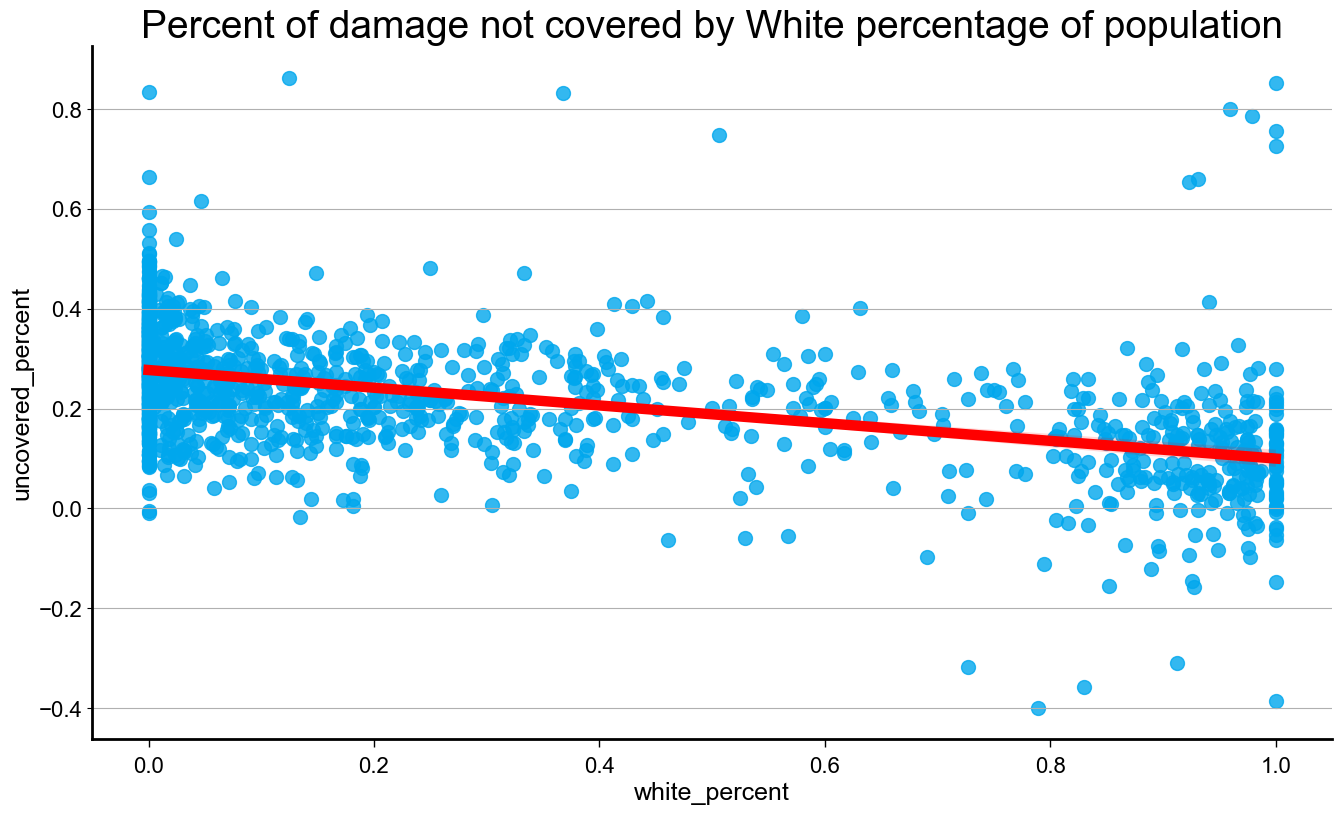

In [7]:
fig, ax = plt.subplots()
sns.regplot(rh_blocks_nola, x='white_percent', y='uncovered_percent', line_kws={'color' : 'red'}, ax=ax)
plt.title('Percent of damage not covered by White percentage of population')
plt.show()
plt.close()

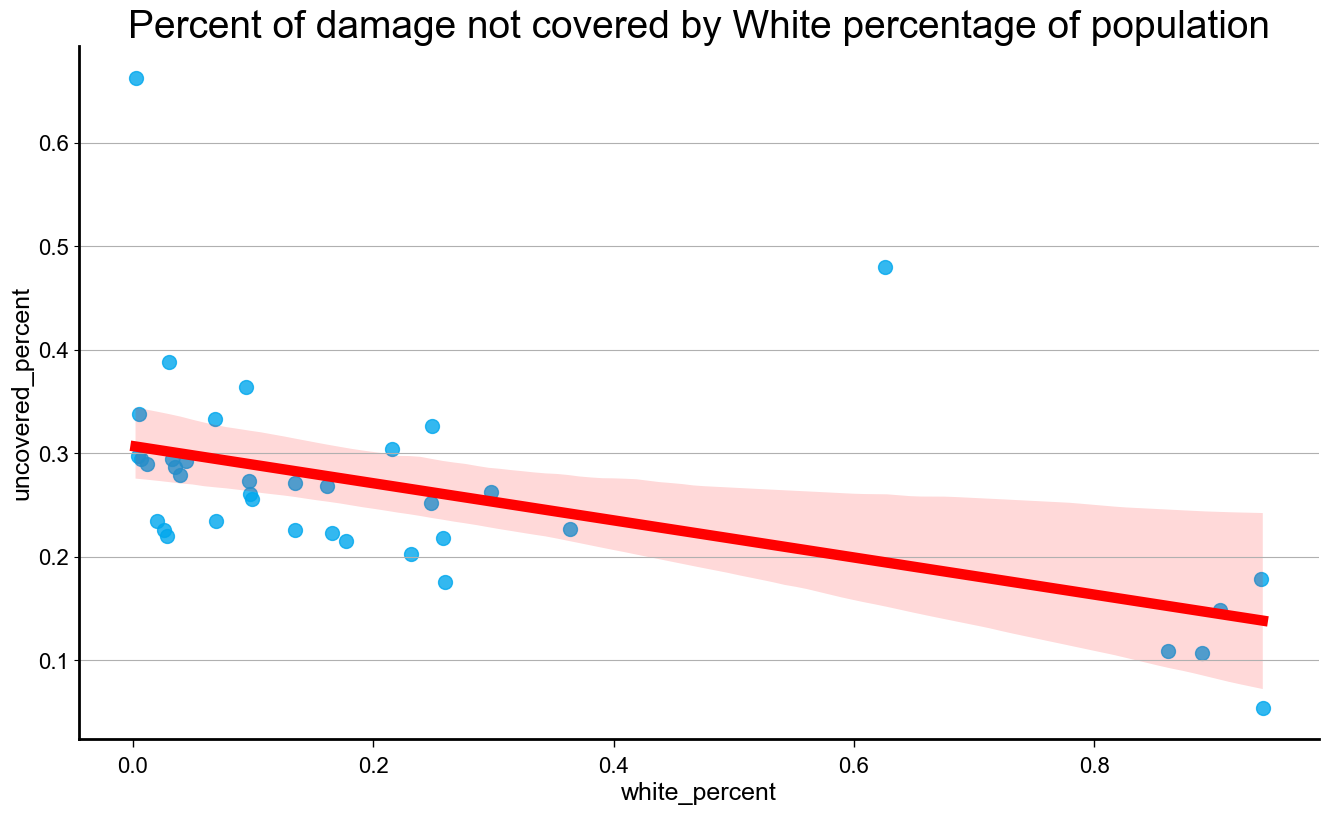

In [8]:
fig, ax = plt.subplots()
sns.regplot(rh_neighborhoods, x='white_percent', y='uncovered_percent', line_kws={'color' : 'red'}, ax=ax)
plt.title('Percent of damage not covered by White percentage of population')
plt.show()
plt.close()

## Damage and compensation by neighborhood

In [10]:
(
    rh_neighborhoods[rh_neighborhoods['damage_sum']>0][
        [   'damage_sum', 
            'grant_insurance_sum', 
            'grant_insurance_mean', 
            'uncovered_sum', 
            'uncovered_mean', 
            'uncovered_percent', 
            'white_percent',
            'rh_household_pct',
            'households_2000_owner_occupied_pct'
    ]
]
.sort_values(by='uncovered_percent')
.rename(columns = 
    {
        'damage_sum' : 'Sum of damage',
        'grant_insurance_sum' : 'Sum of grants+insurance',
        'grant_insurance_mean' : 'Mean grants+insurance per property that received grants',
        'uncovered_sum' : 'Total amount left uncovered by grants+insurance',
        'uncovered_mean' : 'Mean amount left uncovered per property that received grants',
        'uncovered_percent' : 'Percent of damage left uncovered',
        'white_percent' : 'Non-Hispanic White population percentage',
        'rh_household_pct' : 'Percent of households that received grants',
        'households_2000_owner_occupied_pct' : 'Percentage of households that were owner occupied (2000)'
    }
)
)

,Sum of damage,Sum of grants+insurance,Mean grants+insurance per property that received grants,Total amount left uncovered by grants+insurance,Mean amount left uncovered per property that received grants,Percent of damage left uncovered,Non-Hispanic White population percentage,Percent of households that received grants,Percentage of households that were owner occupied (2000)
neighborhood,,,,,,,,,
Lakewood,"27,771,533.61","26,263,319.71","295,093.48","1,508,213.90","16,946.22",0.05,0.94,0.12,0.92
Navarre,"83,730,193.27","74,803,993.60","200,546.90","8,926,199.67","23,930.83",0.11,0.89,0.45,0.56
Audubon,"8,179,229.39","7,286,615.12","177,722.32","892,614.27","21,771.08",0.11,0.86,0.01,0.54
West End,"172,131,805.43","146,596,840.34","225,187.16","25,534,965.09","39,224.22",0.15,0.91,0.43,0.61
Fairgrounds,"11,788,571.47","9,722,515.90","151,914.31","2,066,055.57","32,282.12",0.18,0.26,0.05,0.44
Lakeview Neighborhood,"541,337,816.08","444,920,096.69","241,410.80","96,417,719.39","52,315.64",0.18,0.94,0.59,0.69
Mid-City Neighborhood,"77,964,112.26","62,173,136.69","161,909.21","15,790,975.57","41,122.33",0.20,0.23,0.24,0.28
Milneburg,"228,037,851.97","178,849,611.80","162,442.88","49,188,240.17","44,675.97",0.22,0.18,0.70,0.71
Broadmoor,"152,938,541.39","119,575,253.06","170,578.11","33,363,288.33","47,593.85",0.22,0.26,0.50,0.48


## Additional Compensation Grants

The additional compensation grants did have an impact, particularly in neighborhoods with large amounts of damage that was not covered. But even with those grants, there were still large amounts of damage that went uncovered

In [11]:
wo_acg = rh_neighborhoods[rh_neighborhoods['damage_sum']>0][['compensation_sum', 'insurance_sum', 'damage_sum', 'all_grants_count']].apply(lambda x: (x['damage_sum'] - (x['compensation_sum']+x['insurance_sum']))/x['damage_sum'], axis=1).sort_values(ascending=False)
w_acg = rh_neighborhoods[rh_neighborhoods['damage_sum']>0]['uncovered_percent']

acg_compare = pd.concat([wo_acg.rename('Without ACG'), w_acg.rename('With ACG')], axis=1)
acg_compare['Difference'] = acg_compare['Without ACG'] - acg_compare['With ACG']
acg_compare.sort_values(by="Difference")

,Without ACG,With ACG,Difference
neighborhood,,,
Lakewood,0.06,0.05,0.00
Audubon,0.11,0.11,0.00
Marlyville/Fountainebleau,0.49,0.48,0.01
Lakeview Neighborhood,0.19,0.18,0.01
West End,0.17,0.15,0.02
Navarre,0.13,0.11,0.02
Fillmore,0.29,0.23,0.07
Freret,0.30,0.23,0.07
Gentilly Terrace,0.41,0.33,0.09


In [12]:
rh_neighborhoods[['uncovered_mean', 'white_percent']].dropna(axis=0, subset='uncovered_mean').sort_values(by='uncovered_mean', ascending=False).rename(columns = {'uncovered_mean' : 'Mean amount left uncovered per property that received grants', 'white_percent' : 'Non-Hispanic White percentage of population'})

,Mean amount left uncovered per property that received grants,Non-Hispanic White percentage of population
neighborhood,,
B.W. Cooper,"179,910.67",0.00
Marlyville/Fountainebleau,"174,400.70",0.63
Seventh Ward,"88,949.20",0.03
Gentilly Terrace,"79,128.56",0.25
Holy Cross,"76,928.34",0.09
Lower Ninth Ward Neighborhood,"66,442.24",0.00
Little Woods,"64,733.63",0.10
Milan,"64,527.69",0.22
Pontchartrain Park,"62,333.46",0.01


## Amount uncovered by property by neighborhood

<span class="tex2jax_ignore">The limits on compensation could mean tens of thousands of dollars of uncovered costs for homeowners in primarily non-White neighborhoods that were hard-hit by the storm. For example, even with ACG Lower Ninth Ward homeowners who received grants could expect to be more than &dollar;66,000 short of their damage assessment. In the Seventh Ward, the discrepency was about &dollar;64,000 and in Pontchartrain Park it was about &dollar;63,000.

<span class="tex2jax_ignore">On the other end of the scale, Lakewood residents could expect to be about &dollar;8,000 out of pocket and City Park residents were about &dollar;16,000 short.

<span class="tex2jax_ignore">Looked at another way:
<span class="tex2jax_ignore">In Lakewood, the average amount not covered by insurance and grants was 5% of the mean household income (&dollar;153,990 in 2000 dollars) or about two and a half week's pay.
<span class="tex2jax_ignore">In the Seventh Ward it was nearly 2.5 years' salary (mean household income &dollar;26,519 in 2000 dollars).</span>

In [14]:
(
    rh_neighborhoods[['all_grants_count', 'damage_mean', 'uncovered_percent', 'white_percent']]
    .dropna(axis=0, subset='damage_mean')
    .sort_values(by='damage_mean')
    .rename(columns=
    {
        'all_grants_count' : 'Total number of properties that received grants',
        'damage_mean' : 'Mean amount of damage per property',
        'uncovered_percent' : 'Percentage of damage not covered by grants+insurance',
        'white_percent' : 'Non-Hispanic White percentage of population'
    }
    )
)

,Total number of properties that received grants,Mean amount of damage per property,Percentage of damage not covered by grants+insurance,Non-Hispanic White percentage of population
neighborhood,,,,
Desire Area,195.00,"170,988.41",0.29,0.04
St. Claude,36.00,"181,333.02",0.33,0.07
Fairgrounds,64.00,"184,196.43",0.18,0.26
Hollygrove,603.00,"184,987.20",0.23,0.03
Freret,40.00,"186,135.32",0.23,0.13
Central City Neighborhood,42.00,"188,718.51",0.26,0.10
Florida Area,364.00,"191,408.79",0.30,0.00
Gert Town,52.00,"193,032.26",0.22,0.03
Dixon,114.00,"194,257.71",0.29,0.03
